In [1]:
%load_ext autoreload
%autoreload 2

import argparse
from copy import copy

from utils.load_model import load_model
from utils.plot import plot_gp_vs_cnp_vs_lnp

2023-03-23 11:41:37.485256: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-23 11:41:37.747460: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-23 11:41:37.747480: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-23 11:41:37.797564: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-03-23 11:41:38.960326: W tensorflow/stream_executor/pla

# Load models and dataloaders

In [2]:
# --- USER INPUTS ---
cnp_args = argparse.Namespace(epochs=10,
                              batch=32,
                              task='regression',
                              num_context=100,
                              uniform_sampling=True,
                              model='CNP')

lnp_args = copy(cnp_args)
lnp_args.model = "LNP"

model_paths = {
    "cnp": "checkpoints/cnp/cp-0030.ckpt.index",
    "lnp": "checkpoints/lnp/cp-0080.ckpt.index"
}


# --- LOAD ---
cnp_model, train_ds, test_ds = load_model(cnp_args, model_path=model_paths["cnp"])
lnp_model, _, _ = load_model(lnp_args, model_path=model_paths["lnp"])

Instructions for updating:
Restoring a name-based tf.train.Saver checkpoint using the object-based restore API. This mode uses global names to match variables, and so is somewhat fragile. It also adds new restore ops to the graph each time it is called when graph building. Prefer re-encoding training checkpoints in the object-based format: run save() on the object-based saver (the same one this message is coming from) and use that checkpoint in the future.


1/1 [==============================] - 0s 61ms/step


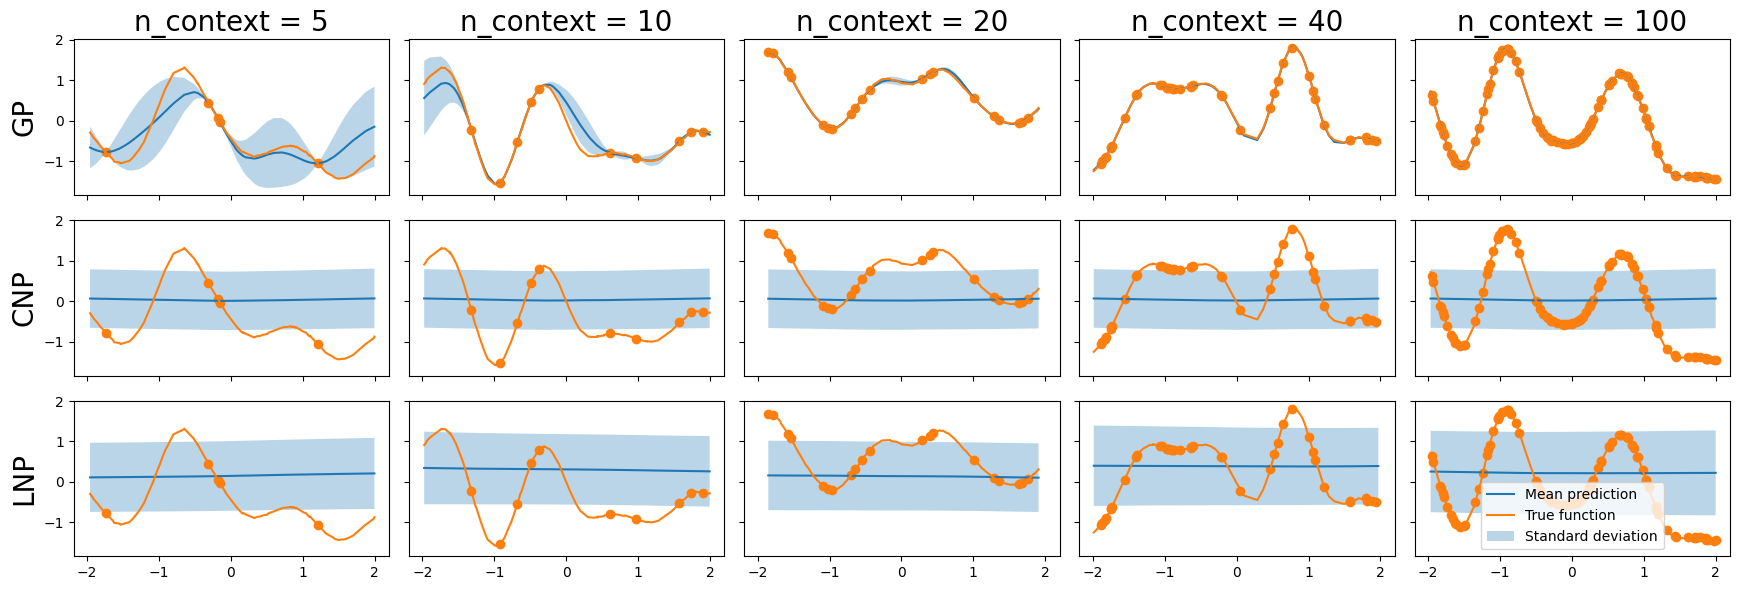

In [3]:
list_num_context = [5, 10, 20, 40, 100]

plot_gp_vs_cnp_vs_lnp(cnp_model=cnp_model,
                      lnp_model=lnp_model,
                      kernel_length_scale=0.4,  # 0.4 is the default parameter
                      list_num_context=list_num_context)  